# Introduction to Predictive Analysis Using Linear Regressions

Upon completion of the workshop/tutorial one should be able to:
* Define what a linear regression is, how one is created, and identify some of its applications in the broad scope of data science and analytics.
* Understand the concept and fundamental theory and how to apply a simple linear regression model to a dataset to predict a result.
* Examine the effects of features and their relationship to each other on model prediction.
* Identify sources for acquiring more in-depth knowledge about linear regression and data science in general.

# Overview
1. View the general process or flow for performing predictive analysis    
2. Define a problem that may be of interest and suitable for predictive analysis    
3. Explore a dataset and prepare it for analysis    
4. Train and test a linear regression model to predict a result
5. Learn where to find more information on data science topics

# Not So Primary Colors
Bob Ross is a famous jovial painter who was known for his television program that tried to teach viewers to paint amazing scenes from nature that included his signature "happy trees". He would often mix colors to add to his palette. Given only the primary colors, how would one replicate Bob's technique to create a nice shade of green for their "happy tree"?

<p float="left"><img src="./images/bob_ross.jpg" style="width: 200px;"/>
    <img src="./images/primary_colors.png" style="width: 400px;"/>
</p>

## Making *Green* Initial Approach
<img src="./images/color_mixing_example.png" alt="Drawing" style="width: 600px;"/>
Well you may remember that green is a combination of the colors *yellow* and *blue*, and you may notice that these two colors were already provided. You try mixing different amounts of these colors until you are finally able to create the three desired shades of *green*!

## Making *Green* Generalized

<img src="./images/color_mixing_example.png" alt="Drawing" style="width: 400px;"/>

Different shades of green consists of a various amounts of two primary colors, *yellow* and *blue*.  So theoretically we could represent any shade of green using a combination of the two colors:

$$ Green = Yellow*amount_{yellow} + Blue*amount_{blue}$$

$$ \begin{align*}
Green_{1} &= Yellow*1 + Blue*2 \\
Green_{2} &= Yellow*2 + Blue*1 \\
Green_{3} &= Green_{1} + Green_{2} + Blue*1 \\
\end{align*} $$

## The Predictive Analysis Work Flow
![PA Work Flow](./images/Predictive_Analysis_Flow1.png)

This analogy is very similar to the approach a modeller would take to predict a result using a dataset. Often we are given a dataset, and this will be the only information available (the primary colors). We may want to learn something from this information to make a decision or prediction (the relationship between *blue*, *yellow*, and *green*. We formulate some generalized relationship in a model so that we can return back to model with new information (different combinations of *blue* and *yellow*) to get an output without having to keep repeating the same steps of learning how the data and results are connected.

# Step 1: What is the Issue?
![PA Work Flow2](./images/Predictive_Analysis_Flow2.png)

## Defining the Problem: Real World Applications
Applying for graduate school can be a pretty stressful time. Not knowing whether or not your grades or entrance score is high enough, which program has the best program to meet your academic needs, and all of this can (and certainly will) constrain the number of applications you complete and to where. Even though acceptances are often subjective based on the pool of candidates that applying that semester, what if there was a way to predict the probability of getting accepted to university's graduate program before applying, or at the very least, which application factor impacts your acceptance most very similar to how we managed to breakdown the color green? 

This tutorial will help elucidate a means of doing just that, but first let's examine the prevelance of this type of problem.

### Defining the Problem: A Persistent Problem
Being able to predict or determine a value via its relationship to other factors, or observations, is pervasive and arises throughout different industries and fields.
- CFO using marketing costs to predict sales revenue
- Doctor wanting to know probability of diagnosis based on symptoms
- Educators wanting to know how much study time is required for students to ace an exam
- How house size and number of rooms affect the price a house would sale for

# Step 2: Understanding the Info We Have
![PA Work Flow3](./images/Predictive_Analysis_Flow3.png)

## Some Basic Exploratory Analysis Tools
Before diving into creating any model, it is best to understand the nature and characteristics of the data being analyzed. One useful library for this is in python is `pandas`. This package offers handy tools for handling and manipulating data. Exploratory analysis is the means of examining specific characteristics or patterns that describe the data in its entirety.  How is data structured, what features are present, what are their respective means, these are all example questions that can be answered using exploratory analysis.

In [1]:
import pandas as pd
file_path = './data/admissions.csv'
df = pd.read_csv(file_path, header=0)

## Graduate Admissions Dataset
The Graduate Admissioins Dataset contains 8 features for 500 applicants, and was obtained from Kaggle. The features are attributes of associated with requirements for getting into a graduate school program, which can be used to determine the likelihood of being accepted. This dataset has been loaded as the pandas DataFrame `df`. We will use `df` to build a linear regression model to help us predict the chances of admittance based on our own credentials!

###  The Dataset Structure
A data frame is a convenient object for structuring data in tables similar to excel.  Using the `df.head()` command returns the first five entries in the dataset. The `head` command has an optional input argument `n` to see the first $n$ entries.

In [ ]:
# Print out the first five entries of the dataset
df.head()

**(TODO) View the first ten entries of the DataFrame using `df.head(n=10)`**

In [ ]:
df.head(n= )

Conversely, `df.tail()` shows the last five. The `tail` command also accepts the optional input argument `n`,to show the last $n$ entries. So the last 10 entries of the dataset is:

In [ ]:
# Print out the last ten entries of the dataset
df.tail(10)

### Dataset Manipulation
Those two commands are a simple means of viewing how the data is organized and formatted, and helps the modeller realize what needs to be done in terms of cleaning.

Using `head` and `tail` we see that this dataset contains the column `CGPA`. This is a 10 point grading scale used commonly in foreign countries, so we want to add column that transforms the 10 point scale into a *4* point scale, because you may want to predict your chances of admittance using a the GPA scale.

#### Adding a New Column
To add a new column to our DataFrame object we can use the `df.insert` module to create a new column, and place it directly next to the CGPA column, for convenient comparison.

In [3]:
# Create the new column "GPA", which equals 4*"CGPA"/10, and place it after the 6th column
df.insert(6,'GPA', 4*df['CGPA']/10)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,3.860,9.65,1,0.92
1,2,324,107,4,4.0,4.5,3.548,8.87,1,0.76
2,3,316,104,3,3.0,3.5,3.200,8.00,1,0.72
3,4,322,110,3,3.5,2.5,3.468,8.67,1,0.80
4,5,314,103,2,2.0,3.0,3.284,8.21,0,0.65


### Statistical Measures 
Another `pandas` function that is useful for exploratory analysis is `df.mean()`, which returns the average across all features. The mean for each feature in our example is:

In [ ]:
# Show the mean for each feature
df.mean()

### More Statistics
`df.describe()` provides more statistical information about each feature, such as the mean, max, min, standard deviation, and quantile information.

**(TODO) Use the describe method of the DataFrame, `df.describe()` to see more statistics.**

In [ ]:
# Show more statistical metrics of each feature using df.describe()


### Exploring the Dataset: Correlations
Plotting features against one another can help visualize if there is a "dependancy" between the two features, or statistically speaking, if the two features are correlated.  

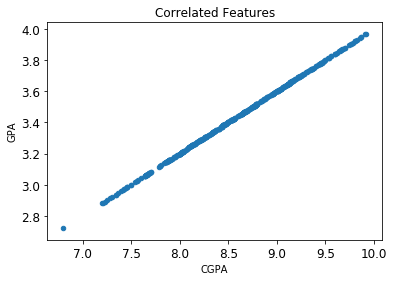

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
df.plot(x='CGPA', y='GPA', 
        kind='scatter',title='Correlated Features',fontsize=12)
plt.show()

#### Less Correlated, but still Correlated
The figure above shows two features that are directly correlated, CGPA and GPA.  To put it simply correlation implies that two feature follow similar trends, i.e. as CGPA increases, GPA increases. In all fairness, GPA was calculated using CGPA, so they should be correlated.  However, two features from the dataset whose correlation may not be so obvious is the applicant's GRE score and their GPA. In the plot below the features still show similar trends, but they're less correlated than the previous two features.

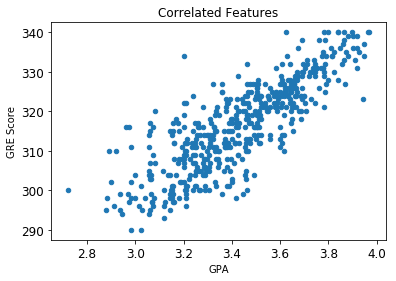

In [5]:
df.plot(x='GPA', y='GRE Score', 
        kind='scatter',title='Correlated Features',fontsize=12)
plt.show()

#### Uncorrelated Features
Uncorrelated features should show no discerning pattern or trends between them. For instance, the quality of the applicant's letters of recommendation should have little to know bearing on how well they performed on the TOEFL. In fact their letters are written by someone completely different from them, hopefully! 

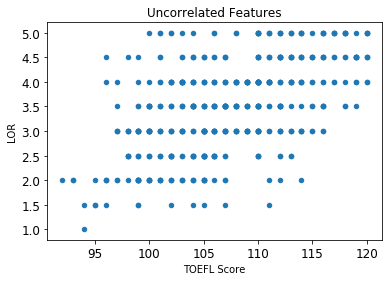

In [6]:
df.plot(x='TOEFL Score', y='LOR',
        kind='scatter',title='Uncorrelated Features',fontsize=12)
plt.show()

**(TODO) Plot TOEFL Score (x='TOEFL Score') vs GRE Score(y='GRE Score') and use `plt.show()` to display the plot. Are the two values correlated?**

In [ ]:
# Fill in the missing arguments, and use plt.show() to display the plot
df.plot(x= ,y=, kind='scatter', title= , fontsize=12)

#### More on Correlations
<p> Visualizations are a great means of seeing conceptually what something is, as in the case of correlation, but it is good practice to find the correlation mathematically. To find more information on the utility of correlation, visit this awesome <a href="https://www.datascience.com/blog/introduction-to-correlation-learn-data-science-tutorials">
post</a> on the different types of correlation and when to use them.</p>

Now let's look at an example using the scikit-learn library to build a linear regression model!

### Other Data Preparation Steps
It is necessary to change categorical data, such as the Research, which is whether the applicant has research experience or not, into a numeric value. This process is called dummifying, and makes calculations more feasible. In addition to dummifying categorical terms, all missing values should be handled accordingly. Missing entries can be replaced with zeros, the average of the column, or imputed using other techniques. Their is no, one, definitive method to replace missing entries, as the best method depends on the specifics of the application. Fortunately, the curators of the `admissions` dataset have already dummified variables and cleaned the data, so it is ready for analysis after loading:

# Checkpoint - Exploratory Analysis
In the Exploratory Analysis section the graduate school admissions dataset was load and converted into a `pandas.DataFrame` object. The conversion was made to enhance analysis capabilities. When loaded directly from `sklearn` the data is provided in two list objects; one contains the observations for the 8 features, and the remaining column of the dataset contains the probability of getting admitted. 

We then **manipulated** the dataset by inserting a new column at a desired location. Afterwards we observed some statistical properties 

# Step 3: Getting the Answers
![PA Work Flow4](./images/Predictive_Analysis_Flow4.png)

## Applications of Linear Regressions
From trend lines to mortality rates, linear regression appears in virtually every field due to its versatility. Linear regressions are a vital tool to any data scientist or data analyst due to their ability to capture accurate relationships using a relatively simple tool.

**Simplicity should be the ultimate goal when analyzing data.**

Remember earlier when the prevelance of similar regression issues where discussed? Here are some visuals that used linear regressions for similar issues.

## Examples in Real-World Situations
Here are some examples of linear regressions applied in the real world situations!

#### Advertising Example
<img src="./linear_regression_examples/advertising_ex.png" alt="Drawing" style="width: 300px;"/>

#### GPA Example
<img src="./linear_regression_examples/gpa_ex.jpg" alt="Drawing" style="width: 300px;" />

#### Finance Example
<img src="./linear_regression_examples/salary_ex.png" alt="Drawing" style="width: 300px;" />

#### Medicine Example
<img src="./linear_regression_examples/medicine_ex.jpg" alt="Drawing" style="width: 300px;" />

## Why Use Regressions???
Regression refers to fitting some data to a function, thus, realizing a relationship between variables that may not be obvious upon initial inspection.

We can describe one or more variables as a mathematical equation of one or more desired variables in the dataset. This allows individuals to be able to *predict* the value of variable, or response variable, using the present values of a model consisting of its terms. In terms of a linear regression, the model is to use a direct one-to-one mapping of terms to a response variable, thus the relationship being described is a *linear* one. 
>“It is likely that 90% or more of real-world applications of data mining end up with a relatively simple regression as the final model, typically after very careful data preparation, encoding, and creation of variables.” – James Wu and Stephen Coggeshall

##  A Tiny Bit of Math...
Consider the basic linear regression model to follow the syntax:

$$ Y = \beta X +\epsilon$$ 

Does the equation look familiar? It is simply the equation for a line that possess the slope $\beta$ and the intercept $\epsilon$. This ability to describe a response with such simplicity is what makes the linear regression the perfect first tool in any data scientist's repitore.

http://www.battaly.com/stat/geogebra/linearregression/

![regress in action](linear_regression_examples/regression_animated.gif "regress in action")

## Model Creation Using Scikit-Learn 
<p> The beauty of working in Python is the access to packages that have been created to help data scientists and modellers do their analysis more efficiently, spending less time with writing code so they can spend more time analyzing. The scikit-learn library (known as the `sklearn` library) is a collection of machine learning tools for Python. For more information, visit their <a href="https://scikit-learn.org/stable/">webpage</a>! There are plenty of examples, a list of commands, and more.<p>
    
The dataset used in this example was previously loaded, but to demonstrate the process from start to finish we begin by importing `pandas` so we can load the dataset.

**(TODO) Import the `pandas` package in python and call it `pd`.**

In [ ]:
# IMPORT the pandas module AND call it pd (import pandas as pd)


### Extracting The Response Term
The response is the variable we eventually want to be able to predict. It is also referred to as the ***regressand***.

In [7]:
# Extract the regressand, Y, from the data frame
sampleData_Y = df.loc[:,'Chance of Admit']
sampleData_Y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

### Extracting Our Observation Terms
The observations are the feature values we want to use determine their relationship to the response to exploit for predictions. They are also known as the ***regressors***.

In [8]:
# Extract the regressors, X, from the data frame
sampleData_X  = df.loc[:,'Serial No.':'Research']
sampleData_X.columns
sampleData_X.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,CGPA,Research
0,1,337,118,4,4.5,4.5,3.860,9.65,1
1,2,324,107,4,4.0,4.5,3.548,8.87,1
2,3,316,104,3,3.0,3.5,3.200,8.00,1
3,4,322,110,3,3.5,2.5,3.468,8.67,1
4,5,314,103,2,2.0,3.0,3.284,8.21,0


### Some Additional Data Manipulation
Often you may be confronted with many features, and not all of them will helpful for making predictions. To find the most informative, or most helpful, features we need to do some feature selection. For this example we want to find the best two features for making a prediction. The F-test is a great way to determine the significance of feature. We can use the `SelectKBest` module to select the `k=2` features for our analysis using the F-test results calculated using `f_regression`. Both modules are apart of the `scikit-learn` package. For more info on F-test and regressions check out this <a href="https://blog.minitab.com/blog/adventures-in-statistics-2/what-is-the-f-test-of-overall-significance-in-regression-analysis">link</a>.

In [9]:
from sklearn.feature_selection import SelectKBest, f_regression
k=2
selector = SelectKBest(f_regression,k=k)
selector.fit(sampleData_X, sampleData_Y)
best_feats = selector.get_support(indices=True)
xTrain_best = sampleData_X.iloc[:,best_feats]
xTrain_best.head()

,GPA,CGPA
0,3.860,9.65
1,3.548,8.87
2,3.200,8.00
3,3.468,8.67
4,3.284,8.21


Notice that one of the best features is `GPA`, which is essentially a transformation of `CGPA`. We know that these two features are very correlated, and correlation affects which features provide the most information. It could be concluded that grade is great indicator for probability of acceptance, and thus we should investigate if only one version is needed, and how this changes the top features. For the sake of readibility we can get rid of the `CGPA`, which is a 10 point scale for grading, and then find the top 2 features.

In [20]:
# Drop or delete 'CGPA' from the columns
newX_train = sampleData_X.drop('CGPA',axis=1)
newX_train.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research
0,1,337,118,4,4.5,4.5,3.860,1
1,2,324,107,4,4.0,4.5,3.548,1
2,3,316,104,3,3.0,3.5,3.200,1
3,4,322,110,3,3.5,2.5,3.468,1
4,5,314,103,2,2.0,3.0,3.284,0


Now that the similar column has been drop let's find the new top features!

In [21]:
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression,k=k)
newX_feats = selector.fit_transform(newX_train, sampleData_Y)
best_feats = selector.get_support(indices=True)
xTrain_best = newX_train.iloc[:,best_feats]
xTrain_best.head()

,GRE Score,GPA
0,337,3.860
1,324,3.548
2,316,3.200
3,322,3.468
4,314,3.284


What are the new top features? This is why exploratory analysis is significant prior to modelling the data! Notice that university rating is not in the top two most informative features. This could be to the subjective nature of the rating metric. One may think that, say an Ivy League school, would be harder to get into, which would be harder to get in. This could be a form of observer bias, where the modeller or research would expect a certain result, and therefore try to see the result manifested in the work. It is important to remain objective, and if there are any doubts, note how the data was collected and proceed with the investigation.

We now have the most informative features for calculating the probability of getting accepted to a graduate school program, and the data has been separated into the $X$ and $Y$ sets, it is time to import some modules to help us build, train, and evaluate a linear regression model:

In [22]:
from sklearn.model_selection import train_test_split # Function for random splitting of data set
from sklearn import linear_model # Function to create linear regression model
from sklearn.metrics import mean_squared_error, r2_score # Functions used to evaluate models

The purpose of partitioning the dataset into a training and testing set is to be able to tune (or fit the parameters) the model using the training set and evaluate the quality of the model using different samples via the testing set. This provides meaningful insight in the model's performance  with out the need for collecting more data. 

![](./images/fig-holdout.png)

The `train_test_split` from `sklearn` separates the data and classes into the two sets by randomly assigning samples to either the training set or the testing set:

In [23]:
# Partition the dataset into training and testing subset
xTrain, xTest, yTrain, yTest = train_test_split(xTrain_best, # First argument is the observation set
                                                sampleData_Y, # Second is the class set
                                                test_size=0.33, # Use 33% of the samples for testing
                                                random_state=42) # The random state tells the function to use the 
                                                                 # same random samples whenever its assigned the 
                                                                 # number 42.

In [ ]:
xTrain.head()

When tuning and testing a model on the same samples, evalution results could be misleading. Two such cases are over/underfitting. Overfitting is when your model performs really well on a specific dataset, but not so well with others. Underfitting is when the model can perform well using *any* dataset samples. In both cases the model is said to lack ***generalizability***, or the ability to perform adequately on a variety of datasets. This can be deterimental when trying to obtain accurate predictions for newly acquired samples.  

Our data is ready for analysis but we still have no model! We can create the linear regression model using a single line of code from `sklearn`:

In [24]:
# Import the function to create linear regression model from the sklearn library
from sklearn import linear_model 
# Create linear regression model and assign it to the variable 'linModel'
linModel = linear_model.LinearRegression()

It is as easy as that. If you are curious about how to use different models, I implore you to visit the `sklearn` webpage previously linked. For more information on the model we just instantiated, such as parameters we could have used to characterize it, methods/functions it uses, etc., Python has a `help()` command. To use `help()`, type the command with function or object in query surrounded by single quotes inside the parentheses, like so:

In [ ]:
help('sklearn.linear_model.base.LinearRegression')

**(TODO) use the help function to find out more about `pandas.DataFrame`**

In [ ]:
# help('<package.module>'), pandas is the <package>, and DataFrame is the module
help()

# Checkpoint -  Formulating a Solution Starting with Some Data Prep
* W separated the data into our response variable (what we want to predict) and observations (what we use to make predictions)
* We used F-score regression to select the best features, and observed how correlation affects which features are informative.
* We divided our dataset into training and testing samples to improve generalizability.
* We created a linear regression instance to be trained and evaluated.

## Training Our Regression
Now that model is created, we need to train it to find the best parameters for making predictions.  Recall that training the linear regression model is solving eq(4) for $\beta$ using the training samples in both $X$ and $Y$. To train the `linModel` we need to use it's `fit` method. This method takes the supplied inputs as $X$ and $Y$. Here is how to train the model:

In [25]:
# Train the model using the randomly selected samples from the train_test_split function
linModel.fit(X=xTrain.values, y=yTrain.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Testing Our Regression
During the testing phase we supply the model with samples it has not seen to evaluate its performance on data that was not used to train it. Testing will inform modellers how accurate the model may perform on newly acquired samples. The following line is the command to test the linear regression model that was previously tuned: 

In [26]:
# Test the model
y_predLin = linModel.predict(xTest.values)

**(TODO) View the prediction results to verify the model works**

In [ ]:
# print(y_predLin)

# Step 4: How Did We Do?
![Pred Analysis Flow4](./images/Predictive_Analysis_Flow5.png)

## The Metrics for Evaluating Performance
Now that we have a linear regression model we need to see how accurate it is. We can do this by calculating the difference between our predictions made on the test set, and their actual chance of admittance using the `mean_squared_error` module from the `sckit-learn` package.

In [27]:
mseLin = mean_squared_error(yTest.values, y_predLin)
print('The Mean Squared Error = {0:.3f}'.format(mseLin))

The Mean Squared Error = 0.004


### The MSE
The Mean Squared Error (MSE) was 0.045, or 4.5%, which means our accuracy is approximately 96.5%. That means our model is decent. Depending on the application, a "good" error result is relative to the task and the dataset provided. For instance, medical diagnosis may wish to have an accuracy closer to 98%. Considering we only want to know what it takes to become a graduate student, our accuracy is good enough.

### The $R^{2}$
Another metric used for model evaluation is $R^{2}$, which tells you how much of the error variance (the spread of error around the average error) that the model is able to cover. How well does the model fit the data? It is the amount of explained variance compared to the total variance. Another way of saying this is, what is the average distances of **ALL** the points from our line. This idea is captured in the image below.  We can use `r2_score` to calculate this value. Once agian, the significance of this value is application specific, so there is no, one, good $R^{2}$ value that works for all cases.

![R2 Explained](./images/r2_explained.png)

In [28]:
# Approximate the variance of error
r2_Lin = r2_score(yTest.values, y_predLin)
print('Goodness of Fit: {0:.3f}'.format(r2_Lin))

Goodness of Fit: 0.796


It is important to note that a "good" $R^{2}$ is field and application specific. There is no single good number, so it is best to combine this with other metrics such as the MSE.

### The Model Coefficients
Now that we have an idea of the model's performance we can observe the parameters, or coefficients, of the linear regression. 

In [29]:
# The model's coefficients
print('Coefficients(slope, bias): ', linModel.coef_)

Coefficients(slope, bias):  [0.0034397  0.38717906]


## Examining the Effects of Each Variable
The linear regression model previously created uses two features to approximate a single line. This can be difficult to visualize, so another means of examining the impact of the features on the regression is by seeing how the regression fits the two features individually.

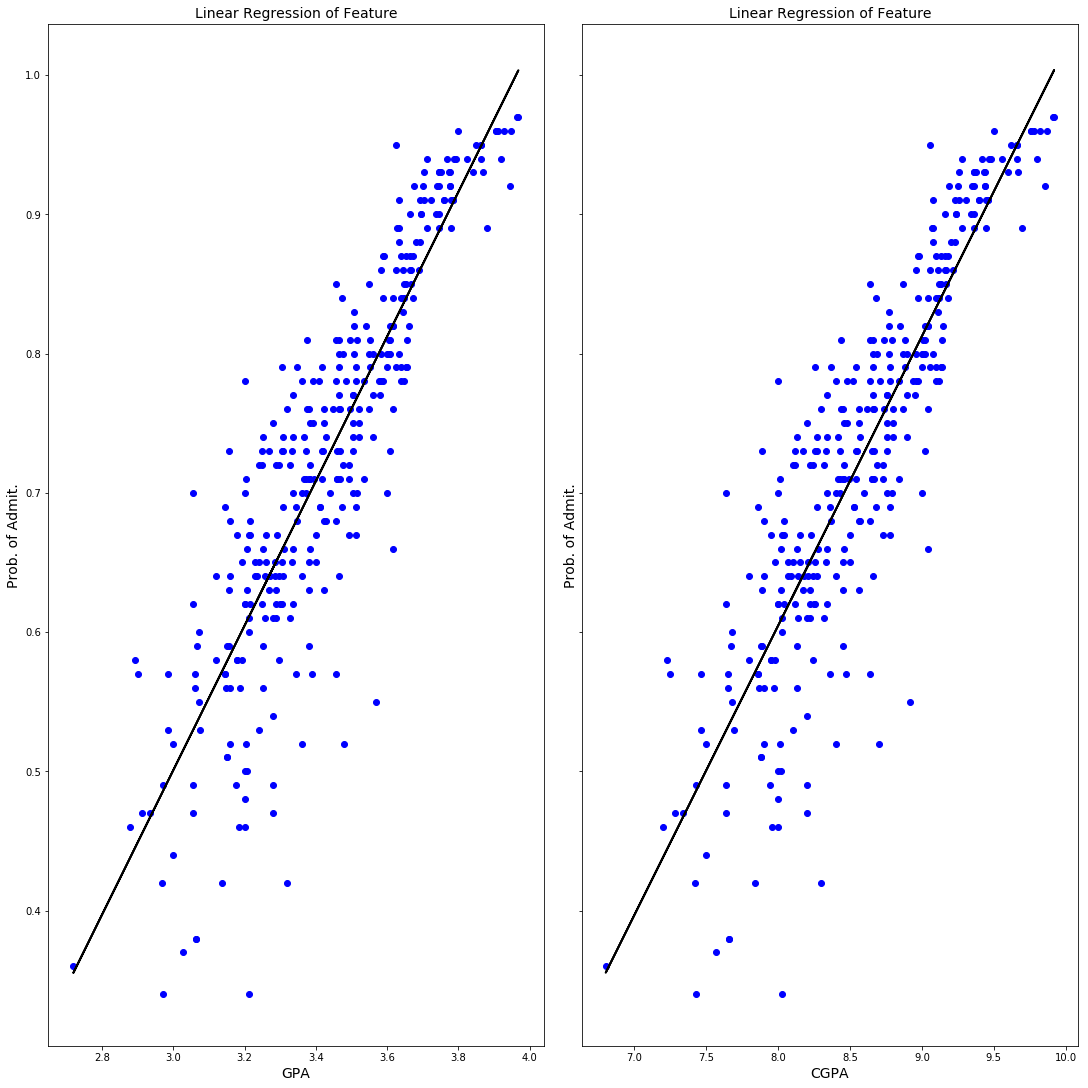

In [19]:
import numpy as np
fig, axes = plt.subplots(1,len(xTrain.columns.values),sharey=True,constrained_layout=True,figsize=(15,15))
for i,e in enumerate(xTrain.columns):
  linModel.fit(xTrain[e].values[:,np.newaxis], yTrain.values)
  axes[i].set_title("Linear Regression of Feature", fontsize=14)
  axes[i].set_xlabel(str(e), fontsize=14)
  axes[i].set_ylabel('Prob. of Admit.', fontsize=14)
  axes[i].scatter(xTrain[e].values[:,np.newaxis], yTrain.values,color='b')
  axes[i].plot(xTrain[e].values[:,np.newaxis], 
  linModel.predict(xTrain[e].values[:,np.newaxis]),color='k', linewidth=2)
plt.show()

# Checkpoint - Assessing the Results

## Assessing the Results: Building on The Base Model
* Validating the model with an additional subset
* Cross-validation
* More rigorous feature engineering
* Other forms of regression

# Try It Out!

In [ ]:
feature1 = 
feature2 =
sample = np.array([[feature1, feature2]]).reshape(-1, 1)
y = linModel.predict(sample)
y

# Finding Additional Resources
Now that you have completed this workshop, you should be able to replicate the this fundamental process for predictive analysis! This workshop was developed to wet your data science palatte! If you want to learn more feel free to check out a few of my favorite resources for learning predictive analysis and other data science topics:

## Books
* <a href="https://www.amazon.com/Linear-Algebra-Step-Kuldeep-Singh/dp/0199654441/ref=sr_1_5?crid=U1E4DNIRTYZ5&keywords=linear+algebra&qid=1553266485&s=books&sprefix=linear+%2Cstripbooks%2C209&sr=1-5"> Linear Algebra: Step by Step</a>
* <a href="https://www.amazon.com/Deep-Learning-Adaptive-Computation-Machine/dp/0262035618/ref=sr_1_1?crid=Z1CEM1E8LWHH&keywords=deep+learning+ian+goodfellow&qid=1553265449&s=books&sprefix=deep+learning%2Cstripbooks%2C327&sr=1-1"> Deep Learning Adaptive Computation Machine</a>
* <a href="https://www.crcpress.com/Foundations-of-Predictive-Analytics/Wu-Coggeshall/p/book/9781439869468"> Foundations of Predictive Analysis</a>
* <a href="https://www.amazon.com/Python-Data-Science-Handbook-Essential/dp/1491912057"> Python Data Science Handbook</a>

## Blogs and Websites
* <a href="https://towardsdatascience.com/"> Towards Data Science</a>
* <a href="https://www.analyticsvidhya.com/"> Analytics Vidhya</a>
* <a href="https://datascience.stackexchange.com/"> Data Science Stack Exchange</a>
* <a href="https://fivethirtyeight.com/"> FiveThirtyEight</a>

## Workshops and Massive Open Online Courses (MOOCs)
* <a href="https://www.lib.ncsu.edu/workshops/upcoming"> NCSU Libraries Data and Viz Workshops</a>
* <a href="https://www.datacamp.com/home"> DataCamp</a>
* <a href="https://www.coursera.org/"> Coursera</a>
* <a href="https://www.edx.org/"> edX</a>


# Appendix
## Some Definitions
Here I will define some terminology. It is common to find multiple definitions for terminology in any capacity, but especially in data science. This stems from the interdiscplinary aspect of the field where different fields have their respective definitions. There is nothing inherently wrong with this, so long as discussion leaves all parties with a cohesive understanding.

***Model*** - A simulation, or representation meant to provide insight on the nature, characteristics, behaviors, and implications on the object or system it is meant to depict.

***Algorithm*** - Although various definitions of algorithms exist, for the purpose of these tutorials we will subscribe to algoritms meaning a set of mathematical steps, or equations, to perform a task. Working under this definition implies that a model is a composition of algorithms. This definition is a personal preference, and used to estabilsh terminology confluence within the context of this tutorial.

***Predictive Analysis*** - the creation and use of a model to derive meaning or speculation as to the state or behavior of a an object or system under certain constraints.

***Exploratory Analysis*** - the process of determining underlining patterns and attributes of a data using statistical, heuristics, or other means not necessarily using a model.

## Intro to the Math behind Linear Regressions
Remember the formula in eq(1)? That was the algebraic equation for the response variable, where y is the response variable we want to model, a is the parameter we want to find to best map our term(s) x to the response, and b is noise that is inherent to the data. For the sake of simplicity, we can think of a response variable in relation to a single term so that we can better understand the intuition using algebra, but it is important to note that the aforementioned variables are vectors and matrices when dealing with multiple linear regressions which requires matrix algebra.  

$$ \begin{align}
Y - \epsilon &= \beta X  \\
(Y - \epsilon)/X &= \beta
\end{align} $$

Since data is represented primarily in vectors in matrices the actual formulation would look slightly different. Let's draw some comparisons between the single variable notation and matrix notation and if you are already comfortable with matrix algebra feel free to skip ahead.

### Brief Introduction to Matrix Algebra 
For the purpose of this lesson, matrices will be denoted by a captial letter. Dividing one matrix by another is equivalent to multiplying the matrix that would be the numerator by the inverse of the matrix that would be the denomator.  

$$ \frac{a}{x} \leftrightarrow {X^{ - 1}}A \\ $$

Squaring a matrix is equivalent to multiplying a matrix by its inverse.

$$ {x^2} \leftrightarrow {X^T}X $$

The identity matrix, $I$, is a square matrix (the number of rows is equal to the number of columns) where the diagonal entries are all 1. So a 2 by 2 identity matrix would look as follows:

$$  I \in {\mathbb{R}^{2x2}} = \left[ 
{\begin{array}{*{20}{c}}
  1&0 \\ 
  0&1 
\end{array}} \right] \\ 
  Y = X\beta  + \varepsilon  \\ $$
  
### Linear Regression via Ordinary Least Squares
Now that we know the notation we can explore eq(1) in terms of what the data actually looks like. Rewriting eq(1) using matrix notation yields:

$$ Y = X\beta  + \varepsilon $$ (2)

Here, $\beta$ are the coefficients of the linear regression model that need to be deterimined, and $\varepsilon$ is the noise or error apparent in our observations. $X$ is now a matrix of our observations, and $Y$ is our target or response term matrix. We now want to find a $\beta$ such that average error between what such as that the average error given the observations is zero, or mathematically:

$$ E[\varepsilon |X] = 0 \\ $$

This suggests that the line taht best describes our response term would be one such that the average distance from all observations is zero. It is possible to find such a line by finding out the relationship between $\beta$ and $\varepsilon$. This method is refered to as minmizing the error sum of squares (SSE or RSS or ESS):
$$ SSE = {\varepsilon ^T}\varepsilon  \\ $$ 
Where $\varepsilon$ is:
$$ \varepsilon  = Y - X\beta  \\ $$
and
$$ {\varepsilon ^T} = {(Y - X\beta )^T} \\ $$
Therefore, SSE is equal to:
$$ SSE = {(Y - X\beta )^T}(Y - X\beta )  (3)\\ $$

### Error Sum of Squares and Ordinary Least Squares
Error sum of squares (ESS or SSE) is exactly what it sounds like. It is the a summation of all the differences between the predicted results and the actual results squared. The term itself describes the variance, or how spread out the error of the model is. If the variance is large, then the model is almost no better than choosing a prediction at random, so we want to minimize the SSE such that it is zero. Since the only term the model can actually change is the fitting parameters, we need to find out how the SSE changes when the parameters being fitted change and set resulting equation equal to zero. The derivation below shows setting the first derivative of SSE with respect of $\beta$ using eq(3):

$$\begin{align}
  \frac{{\partial SSE}}{{\partial \beta }} &= 2[({X^T}X)\beta  - {X^T}Y] \\ 
   &= 2{X^T}(X\beta  - Y) \\ 
   &= 2{X^T}(\hat Y - Y) \\ 
  0 &= 20[({X^T}X)\beta  - {X^T}Y] \\ 
  0 &= ({X^T}X)\beta  - {X^T}Y  
\end{align}$$ 

Now that we have the correct equation, we can solve for $\beta$ in terms of $X$ and $Y$:

$$ \begin{align}
0 &= ({X^T}X)\beta  - {X^T}Y \\ 
{X^T}Y &= ({X^T}X)\beta \\
\beta &= ({X^T}X)^{-1}({X^T}Y)\qquad (4)\\
\end{align}$$

This method of fitting $\beta$ is now as finding the ordinary least squares estimator for $\beta$. It is one way validate the fit of the model. Another method of evaluating the linear regression's ability to fit is by calculating the $R^{2}$ value or as it is known the coefficient of determination. It is used to quantitate how well the predictions can be calculated using the real data.